In [1]:
import pandas as pd 
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_37765/3899810634.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=32,
                                                    stratify=y)

# standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [3]:
from sklearn.ensemble import RandomForestClassifier
# Random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8051948051948052

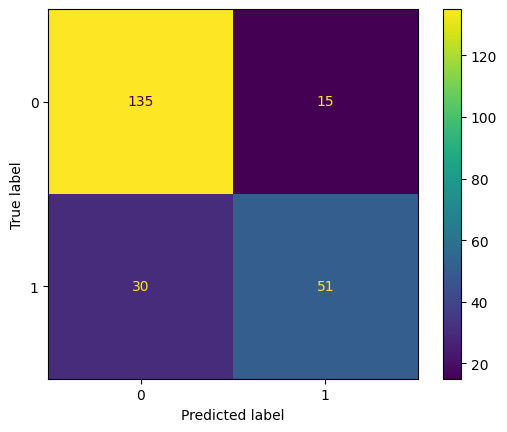

In [4]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

In [5]:
#tp/(tp + fn)
51/81

0.6296296296296297

In [6]:
print(rf.feature_importances_, X.columns)

[0.08267844 0.25043982 0.09926104 0.07052449 0.07477923 0.15471635
 0.11956925 0.14803139] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


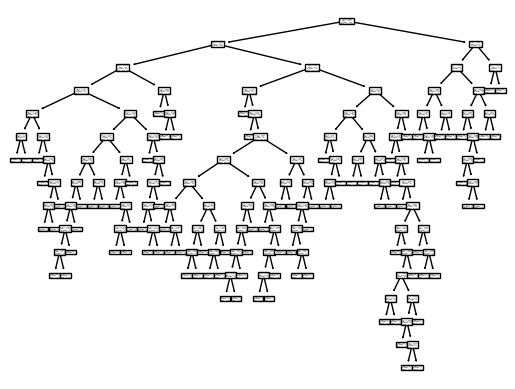

In [8]:
import matplotlib.pyplot as plt
tree_5 = rf.estimators_[4]
tree.plot_tree(tree_5)
plt.savefig("rf_tree.png")

In [ ]:
# look at the documentation for random forest to understand what else is available
# to improve the model

In [11]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 2.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

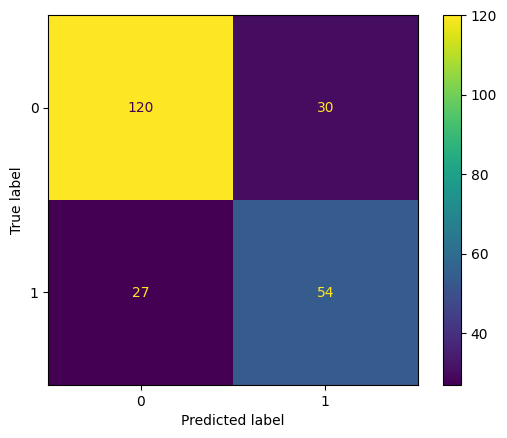

In [13]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [14]:
54/(27+54)

0.6666666666666666

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC = receiving operating characteristic curve
# ROC curves summarize the trade-off between true postives
# And false positives. They are most appropriate for
# Balanced datasets. Can be overly optimistic for severely
# imbalanced classification problems. 
print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
# higher AUC shows a better model typically
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.  0.2 1. ] [0.         0.66666667 1.        ]


0.7333333333333333

Text(0, 0.5, 'True Positive Rate')

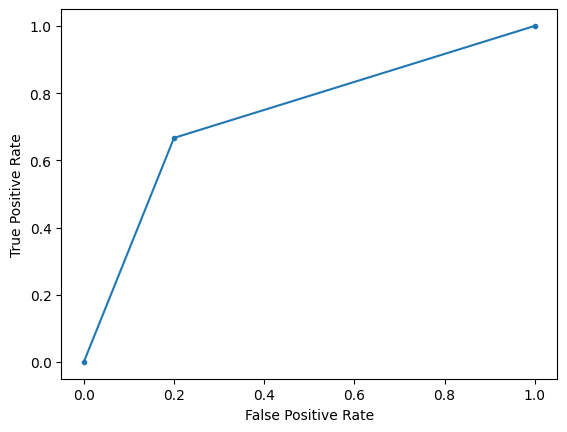

In [16]:
plt.plot(fpr, tpr, marker = ".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [20]:
# precision-recall curve summarized the tradeoff between
# true positive rates and positive values. These are ideal
# for imbalanced datasets (where one outcome is 10x+ more likely
# than another)
from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

pr_auc = auc(recall, precision)
pr_auc

0.7132034632034632

Text(0, 0.5, 'Precision')

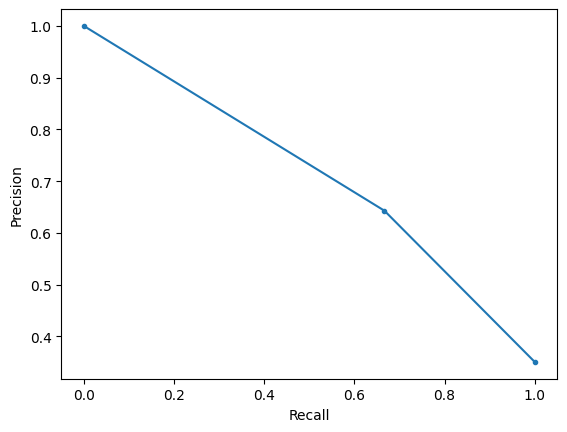

In [21]:
plt.plot(recall, precision, marker=".")
plt.xlabel('Recall')
plt.ylabel('Precision')

In [22]:
# f1 score = 2*precision*recall/(precision+recall)
# It combined precision and recall scores to compute how many
# time the model made a correct prediction across the whole
# dataset
f1 = f1_score(y_test, y_pred)
f1

0.6545454545454545